In [ ]:
import pandas as pd
import numpy as np
import calendar
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from datetime import date, datetime
from dateutil.relativedelta import relativedelta, MO

import os
import itertools
import csv
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import psycopg2
#import pyramid
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
#from pyramid.arima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Series
from matplotlib import pyplot

# This import is to remove warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_1eLl9Yf.csv to test_1eLl9Yf.csv
Saving train_fwYjLYX.csv to train_fwYjLYX.csv


In [ ]:
# Importing all datasets
train = pd.read_csv("train_fwYjLYX.csv")
test = pd.read_csv("test_1eLl9Yf.csv")

In [ ]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [ ]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [ ]:
train.info()

In [ ]:
train.isna().sum()

In [ ]:
train['segment'].unique()

In [ ]:
train['branch_id'].unique()

In [ ]:
train['state'].unique()

In [ ]:
train['zone'].unique()

In [ ]:
state_zone = {'state': ['WEST BENGAL', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH', 'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'ORISSA','GUJARAT',
                        'ASSAM', 'JHARKHAND', 'UTTARAKHAND', 'KERALA', 'CHHATTISGARH', 'BIHAR', 'TRIPURA', 'MADHYA PRADESH', 'HARYANA'], 
              'zone_corrected': ['EAST', 'NORTH', 'SOUTH', 'SOUTH', 'NORTH', 'NORTH', 'CENTRAL', 'SOUTH', 'WEST', 'EAST', 'WEST',
                       'EAST', 'EAST', 'NORTH', 'SOUTH', 'CENTRAL', 'EAST', 'EAST', 'CENTRAL', 'NORTH']}
state_df = pd.DataFrame.from_dict(state_zone)

In [ ]:
holidays = {'holiday_date':["2017-01-01", "2017-01-14", "2017-01-26", "2017-02-24", "2017-03-13", "2017-03-28", "2017-04-05", "2017-04-09", "2017-04-17", 
                            "2017-05-01", "2017-05-05", "2017-06-25", "2017-06-26", "2017-08-07", "2017-08-14", "2017-08-15", "2017-08-25", "2017-09-02",
                            "2017-09-04", "2017-09-30", "2017-10-01", "2017-10-02", "2017-10-19", "2017-12-01", "2017-12-25", 
                            '2018-01-01', '2018-01-14', '2018-01-26', '2018-02-14', '2018-03-02', '2018-03-18', '2018-03-25', '2018-03-29', '2018-03-30', 
                            '2018-04-30', '2018-05-01', '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03', 
                            '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-19', '2018-11-07', '2018-11-21', '2018-11-23', '2018-12-25', 
                            '2019-01-01', '2019-01-14', '2019-01-26', '2019-03-04', '2019-03-21', '2019-04-06', '2019-04-13', '2019-04-17', '2019-04-19',
                            '2019-05-01', '2019-05-18', '2019-06-05', '2019-07-04', '2019-08-12', '2019-08-15', '2019-08-24', '2019-09-02', '2019-09-10', 
                            '2019-09-11', '2019-10-02', '2019-10-08', '2019-10-27', '2019-11-10', '2019-11-12', '2018-12-25']}
holiday_df = pd.DataFrame(holidays)
holiday_df['isHolilday'] = 1
holiday = holiday_df.set_index('holiday_date')

In [ ]:
df = train.copy()
df['application_date'] = pd.to_datetime(df['application_date'], format='%Y-%m-%d')
df2 = df.groupby(['application_date', 'segment'])['case_count'].sum().reset_index()
df2 = df2.set_index('application_date')
df2 = df2.join(holiday)
df2 = df2.fillna(0)
df2 = df2.reset_index()
df2 = df2.rename(columns={"index": "application_date"})

In [ ]:
df2['month'] = df['application_date'].dt.month
df2['year'] = df['application_date'].dt.year
df2['day'] = df['application_date'].dt.day

In [ ]:
df2.head()

,application_date,segment,case_count,isHolilday,month,year,day
0,2017-04-01,1,299.0,0.0,4,2017,1
1,2017-04-01,2,897.0,0.0,4,2017,3
2,2017-04-02,2,605.0,0.0,4,2017,4
3,2017-04-03,1,42.0,0.0,4,2017,5
4,2017-04-03,2,2016.0,0.0,4,2017,7


In [ ]:
daily_1 = df2[df2['segment'] == 1].groupby(["application_date",'segment'])['case_count', 'isHolilday'].sum().reset_index().sort_values('application_date')
daily_1['isHolilday'] = daily_1['isHolilday'].div(2)
daily_1.head()

,application_date,segment,case_count,isHolilday
0,2017-04-01,1,299.0,0.0
1,2017-04-03,1,42.0,0.0
2,2017-04-04,1,23.0,0.0
3,2017-04-05,1,1530.0,0.5
4,2017-04-07,1,1341.0,0.0


In [ ]:
daily_1 = daily_1.set_index('application_date')

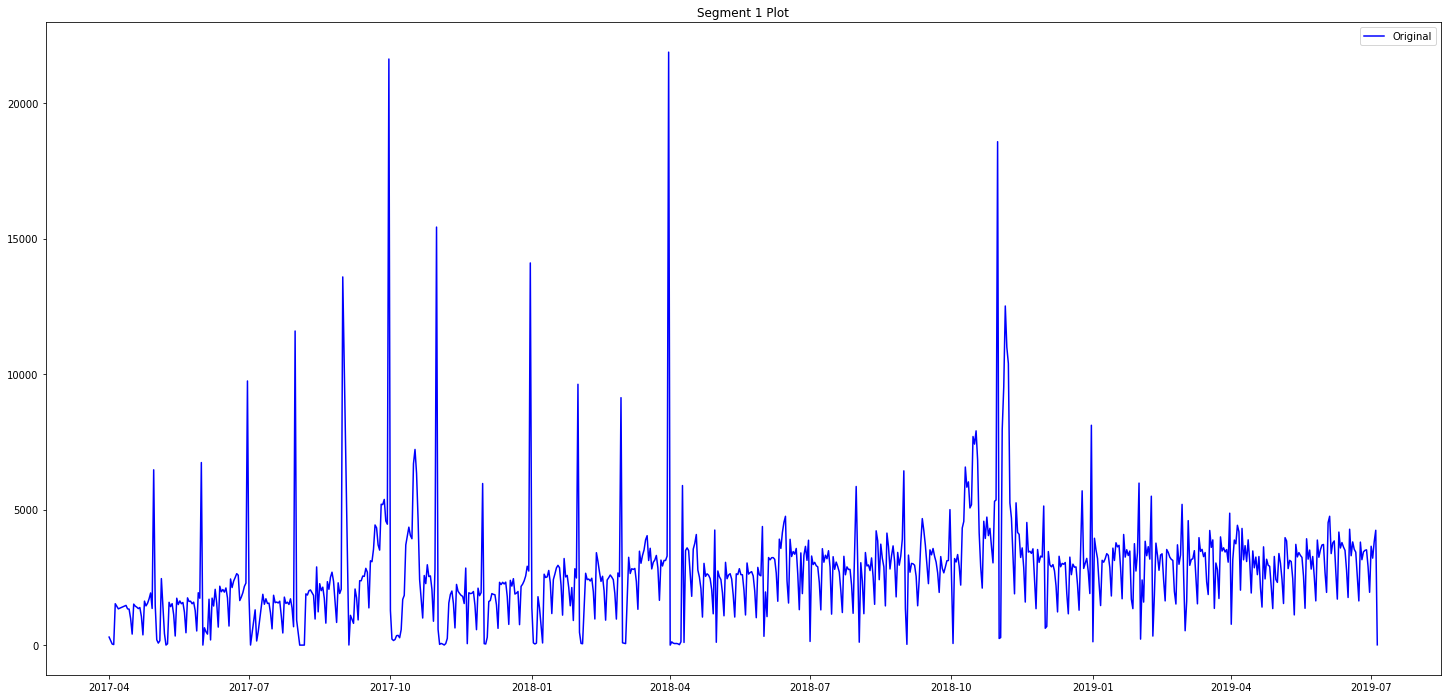

In [ ]:
fig = plt.figure(figsize=(25, 12))
orig = plt.plot(daily_1.case_count, color='blue',label='Original')
plt.legend(loc='best')
plt.title('Segment 1 Plot')
plt.show()

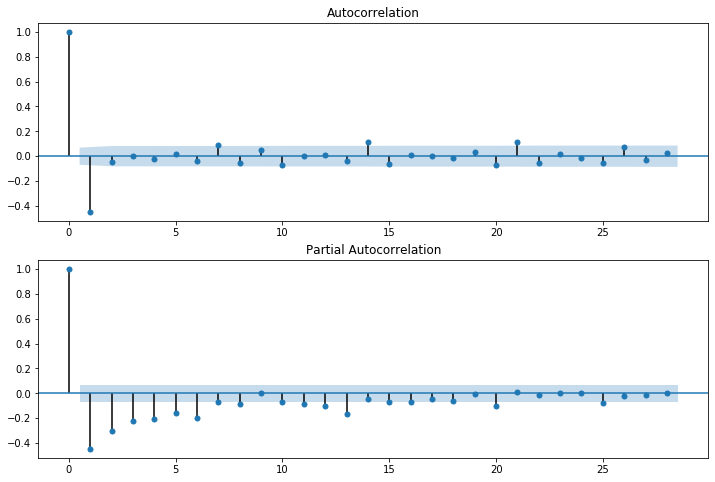

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_1['case_count'].diff().dropna(), lags=28, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_1['case_count'].diff().dropna(), lags=28, ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(25, 12))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

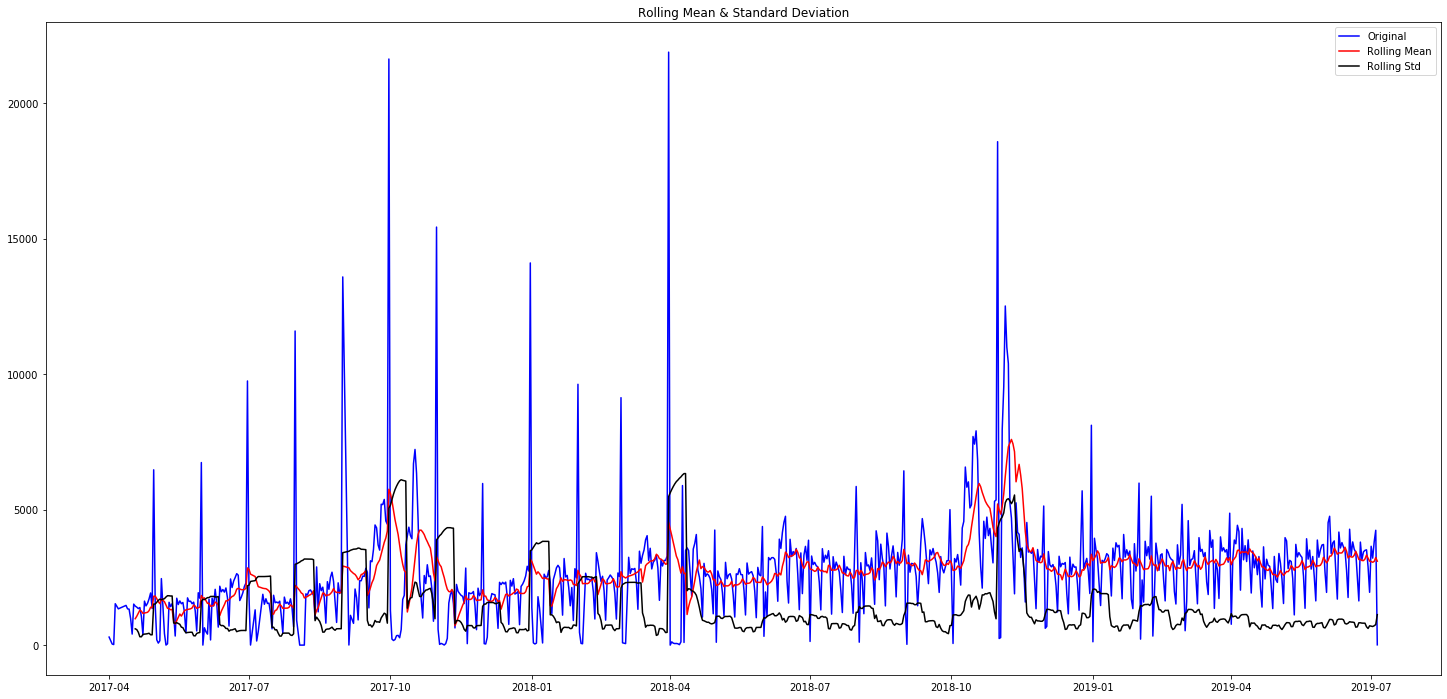

Results of Dickey-Fuller Test:
Test Statistic                  -3.280499
p-value                          0.015773
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64


In [ ]:
test_stationarity(daily_1.case_count)

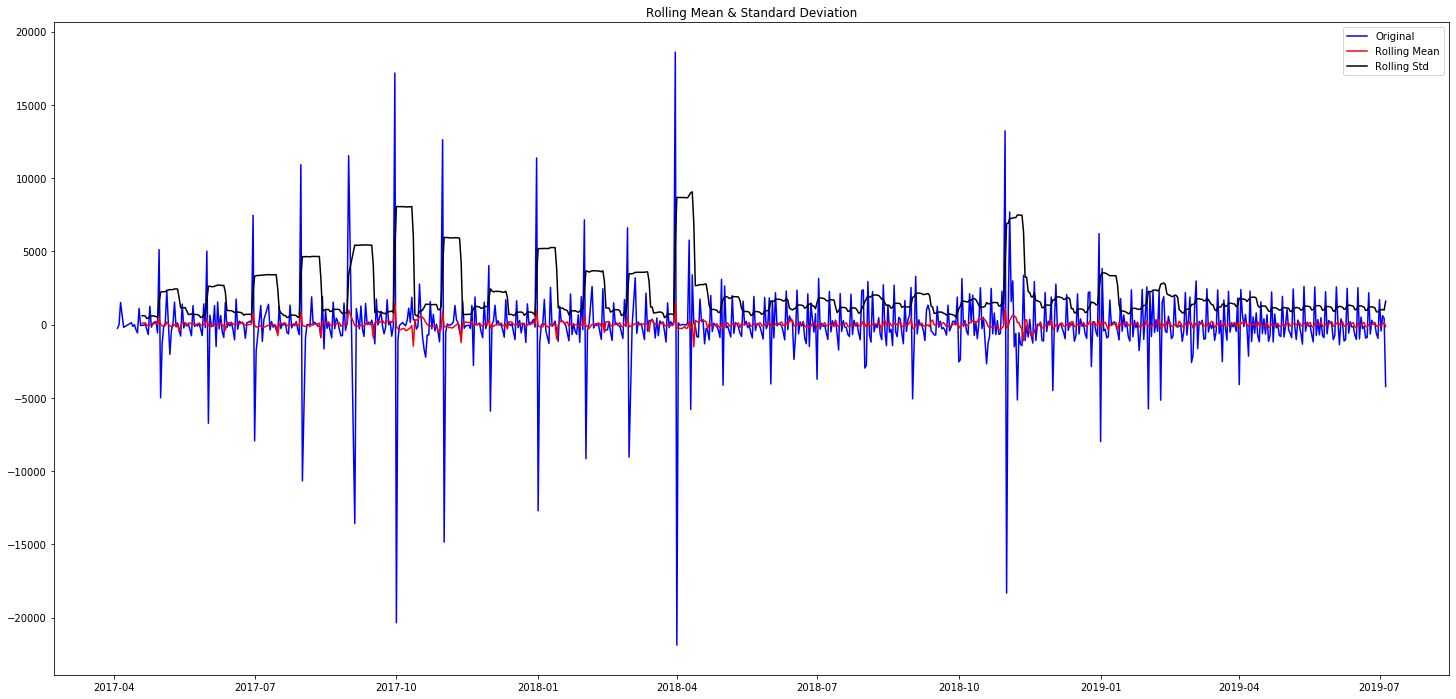

Results of Dickey-Fuller Test:
Test Statistic                -1.127866e+01
p-value                        1.474814e-20
#Lags Used                     1.900000e+01
Number of Observations Used    7.850000e+02
Critical Value (1%)           -3.438708e+00
Critical Value (5%)           -2.865229e+00
Critical Value (10%)          -2.568734e+00
dtype: float64


In [ ]:
daily_1['first_diff'] = daily_1.case_count - daily_1.case_count.shift(1)
test_stationarity(daily_1.first_diff.dropna(inplace = False))

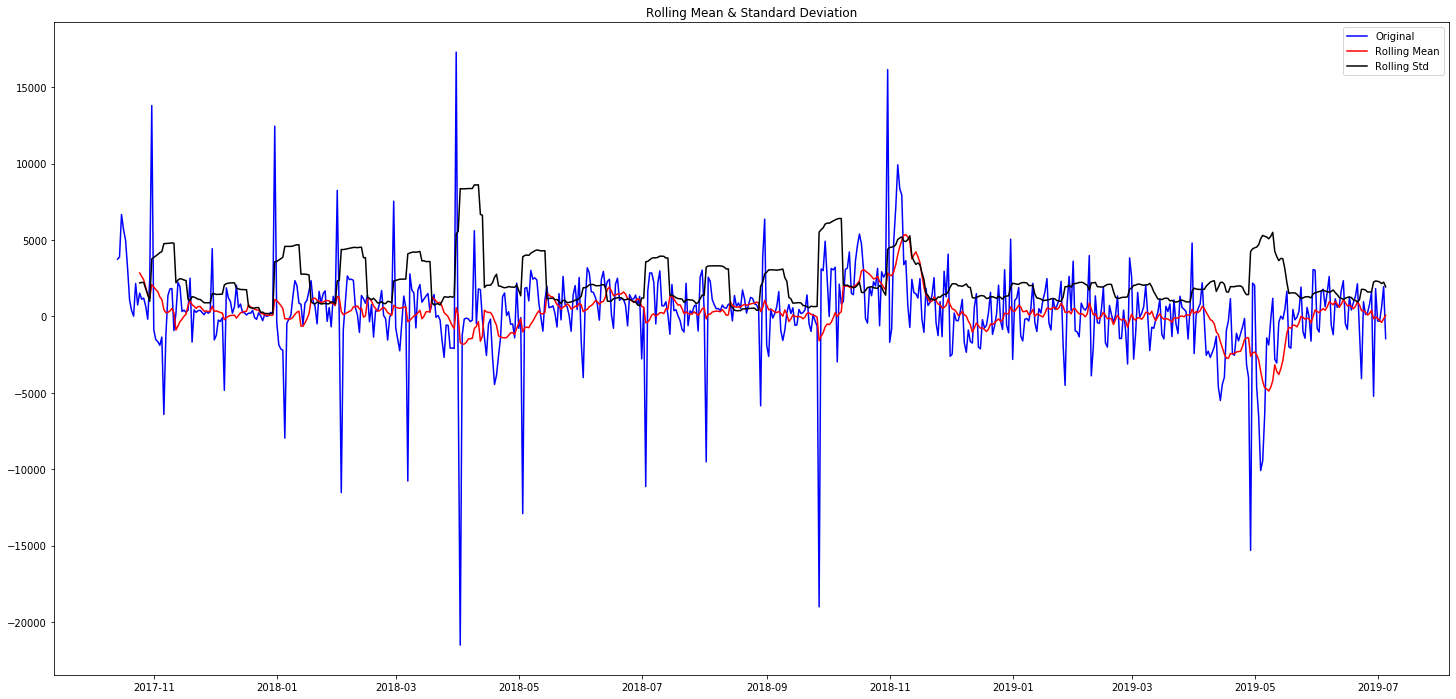

Results of Dickey-Fuller Test:
Test Statistic                  -4.016572
p-value                          0.001326
#Lags Used                      13.000000
Number of Observations Used    612.000000
Critical Value (1%)             -3.441080
Critical Value (5%)             -2.866274
Critical Value (10%)            -2.569291
dtype: float64


In [ ]:
daily_1['seasonal_diff'] = daily_1.case_count - daily_1.case_count.shift(180)
test_stationarity(daily_1.seasonal_diff.dropna(inplace = False))

In [ ]:
model=sm.tsa.statespace.SARIMAX(endog=daily_1['case_count'],order=(0,1,0),seasonal_order=(0,0,1,90),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         case_count   No. Observations:                  893
Model:             SARIMAX(0, 1, 0)x(0, 0, 1, 90)   Log Likelihood               -7448.675
Date:                            Sun, 26 Jan 2020   AIC                          14903.350
Time:                                    05:32:58   BIC                          14917.730
Sample:                                         0   HQIC                         14908.846
                                            - 893                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3553     85.808     -0.004      0.997    -168.535     167.824
ma.S.L90      -0.0715      0.043   

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 90) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 90)
SARIMAX: (0, 0, 1) x (0, 1, 0, 90)
SARIMAX: (0, 1, 0) x (0, 1, 1, 90)
SARIMAX: (0, 1, 0) x (1, 0, 0, 90)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=daily_1['case_count'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 90)12 - AIC:15379.711675593364
SARIMAX(0, 0, 0)x(0, 0, 1, 90)12 - AIC:13542.02322639335
SARIMAX(0, 0, 0)x(0, 1, 0, 90)12 - AIC:13466.117666799431
SARIMAX(0, 0, 0)x(0, 1, 1, 90)12 - AIC:11431.396854289711
SARIMAX(0, 0, 0)x(1, 0, 0, 90)12 - AIC:13363.163602368186
SARIMAX(0, 0, 0)x(1, 0, 1, 90)12 - AIC:13187.628827896318
SARIMAX(0, 0, 0)x(1, 1, 0, 90)12 - AIC:11562.190445191067
SARIMAX(0, 0, 0)x(1, 1, 1, 90)12 - AIC:11432.037416563013
SARIMAX(0, 0, 1)x(0, 0, 0, 90)12 - AIC:15049.419633423639
SARIMAX(0, 0, 1)x(0, 0, 1, 90)12 - AIC:13382.280671918383
SARIMAX(0, 0, 1)x(0, 1, 0, 90)12 - AIC:13434.853865031602
SARIMAX(0, 0, 1)x(0, 1, 1, 90)12 - AIC:11380.894956183898
SARIMAX(0, 0, 1)x(1, 0, 0, 90)12 - AIC:13302.692499612398
SARIMAX(0, 0, 1)x(1, 0, 1, 90)12 - AIC:13123.17430545441
SARIMAX(0, 0, 1)x(1, 1, 0, 90)12 - AIC:11536.939178598219
SARIMAX(0, 0, 1)x(1, 1, 1, 90)12 - AIC:11375.874319572578
SARIMAX(0, 1, 0)x(0, 0, 0, 90)12 - AIC:14886.140157161964
SARIMAX(0, 1, 0)

In [ ]:
# ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:13724.798405694624
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:14051.373782081495
#SARIMAX(1, 1, 1)x(1, 1, 1, 90)12 - AIC:11202.203264245765

mod = sm.tsa.statespace.SARIMAX(daily_1.case_count,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 90),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1034      0.023      4.427      0.000       0.058       0.149
ma.L1         -0.9371      0.013    -73.238      0.000      -0.962      -0.912
ar.S.L90      -0.0800      0.035     -2.311      0.021      -0.148      -0.012
ma.S.L90      -1.1013      0.061    -18.101      0.000      -1.221      -0.982
sigma2      3.095e+06   2.24e+05     13.788      0.000    2.65e+06    3.53e+06


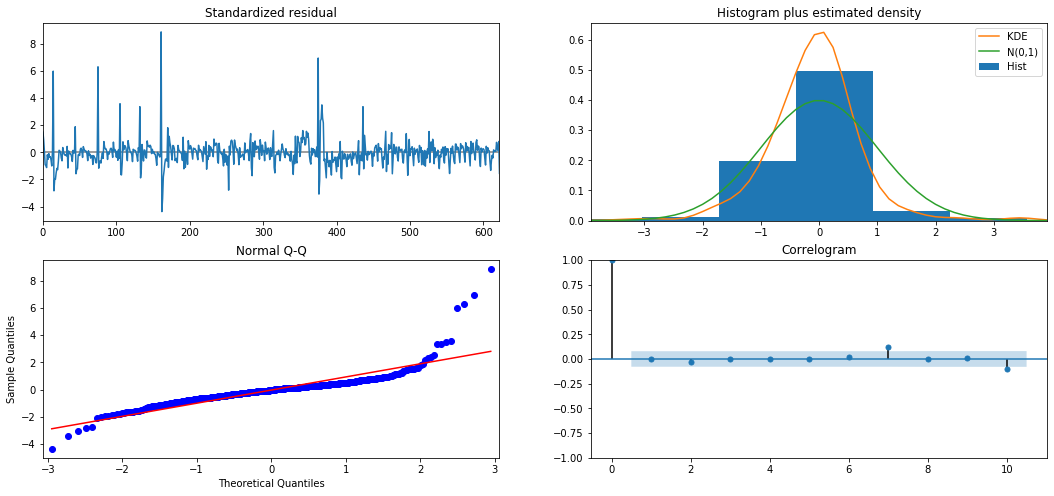

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

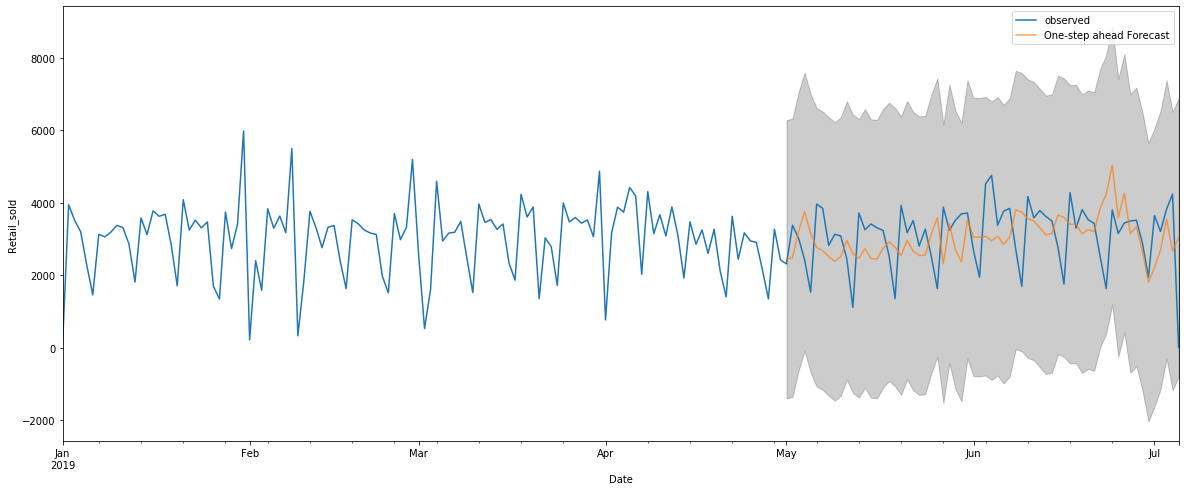

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = daily_1.case_count['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pd.DataFrame(pred.predicted_mean)
y_truth = daily_1['2019-05-01':]
mse = ((y_forecasted[0] - y_truth['case_count']) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 1135118.48
The Root Mean Squared Error is 1065.42


In [ ]:
mape_1 = (((y_forecasted[0] - y_truth['case_count'])/y_truth['case_count']).abs()).mean()/len(daily_1.index)*100
mape_1

0.47669316597545897

In [ ]:
FORECAST = 87
next90d = results.get_forecast(steps=FORECAST)
next90d_ci = next90d.conf_int()

In [ ]:
futureDates = pd.date_range(start = '2019-07-06', periods=FORECAST, freq='D')
next90d_ci.index = futureDates
next90d_ci['case_count'] = (next90d_ci['lower case_count'] +next90d_ci['upper case_count'])/2
next90d_ci = next90d_ci.drop(['lower case_count', 'upper case_count'], axis=1)
next90d_ci['segment'] = 1
next90d_ci = next90d_ci[['segment', 'case_count']]
next90d_ci.reset_index(inplace = True)
next90d_ci = next90d_ci.rename(columns={'index':'application_date'})
next90d_ci

,application_date,segment,case_count
0,2019-07-06,1,2941.411979
1,2019-07-07,1,3590.129183
2,2019-07-08,1,3609.344222
3,2019-07-09,1,3584.572431
4,2019-07-10,1,3338.435205
...,...,...,...
82,2019-09-26,1,3638.240636
83,2019-09-27,1,3158.339343
84,2019-09-28,1,2036.007695
85,2019-09-29,1,2629.388621


In [ ]:
#ax = daily_1.case_count['2019':].plot(label='observed', figsize=(20, 8))
#next90d_ci.case_count.plot(ax=ax, label='Forecast')
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.25)
#ax.set_xlabel('Date')
#ax.set_ylabel('Sales')
#plt.legend()
#plt.show()

### Segment 2

In [ ]:
daily_2 = df2[df2['segment'] == 2].groupby(["application_date",'segment'])['case_count', 'isHolilday'].sum().reset_index().sort_values('application_date')
daily_2['isHolilday'] = daily_2['isHolilday'].div(2)
daily_2.head()

,application_date,segment,case_count,isHolilday
0,2017-04-01,2,897.0,0.0
1,2017-04-02,2,605.0,0.0
2,2017-04-03,2,2016.0,0.0
3,2017-04-04,2,2245.0,0.0
4,2017-04-05,2,2415.0,0.5


In [ ]:
daily_2 = daily_2.set_index('application_date')

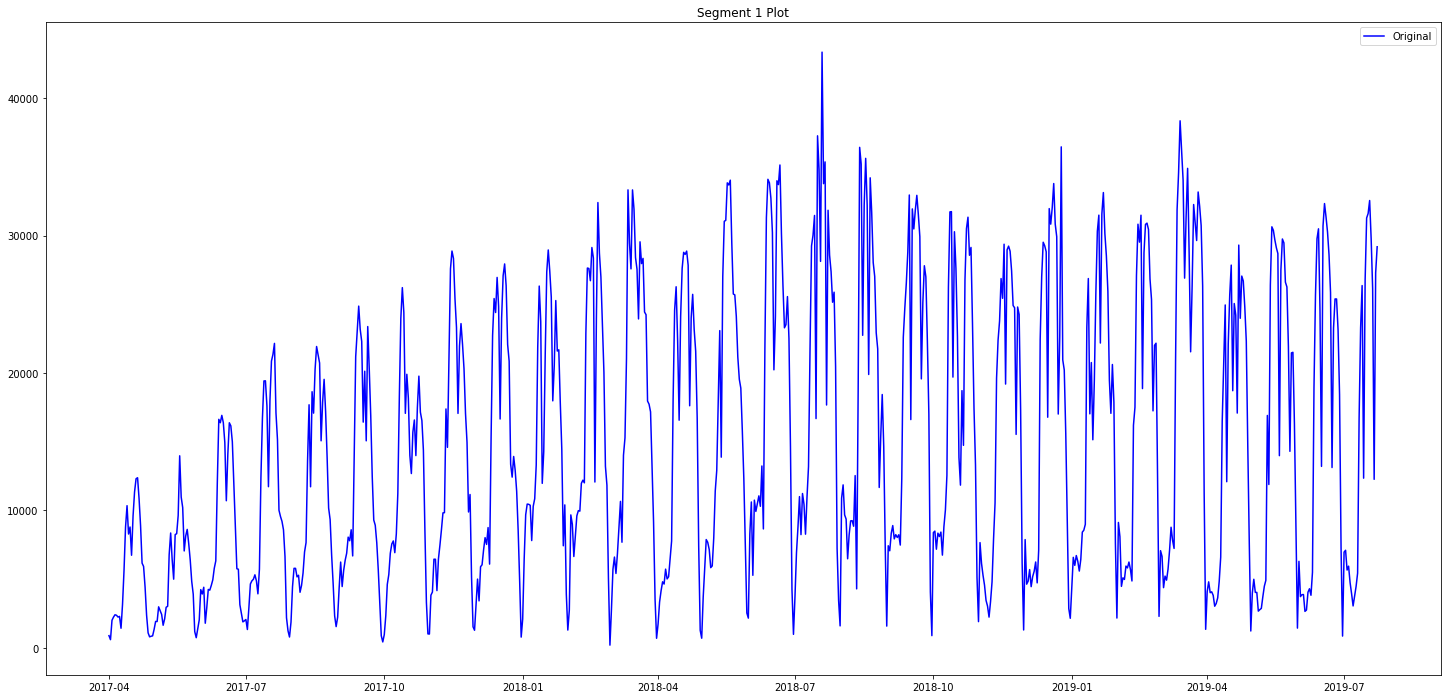

In [ ]:
fig = plt.figure(figsize=(25, 12))
orig = plt.plot(daily_2.case_count, color='blue',label='Original')
plt.legend(loc='best')
plt.title('Segment 1 Plot')
plt.show()

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=daily_2['case_count'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 90)12 - AIC:18936.014983227273
SARIMAX(0, 0, 0)x(0, 0, 1, 90)12 - AIC:16585.24719437753
SARIMAX(0, 0, 0)x(0, 1, 0, 90)12 - AIC:15484.347758657766
SARIMAX(0, 0, 0)x(0, 1, 1, 90)12 - AIC:13655.442007633417
SARIMAX(0, 0, 0)x(1, 0, 0, 90)12 - AIC:15504.541154281696
SARIMAX(0, 0, 0)x(1, 0, 1, 90)12 - AIC:15484.8691376336
SARIMAX(0, 0, 0)x(1, 1, 0, 90)12 - AIC:13674.56037533902
SARIMAX(0, 0, 0)x(1, 1, 1, 90)12 - AIC:13655.686220387717
SARIMAX(0, 0, 1)x(0, 0, 0, 90)12 - AIC:18327.091164609436
SARIMAX(0, 0, 1)x(0, 0, 1, 90)12 - AIC:16289.80427396574
SARIMAX(0, 0, 1)x(0, 1, 0, 90)12 - AIC:15308.259444203037
SARIMAX(0, 0, 1)x(0, 1, 1, 90)12 - AIC:13477.896273339218
SARIMAX(0, 0, 1)x(1, 0, 0, 90)12 - AIC:16232.799536634524
SARIMAX(0, 0, 1)x(1, 0, 1, 90)12 - AIC:16189.98103380763
SARIMAX(0, 0, 1)x(1, 1, 0, 90)12 - AIC:13508.440347987113
SARIMAX(0, 0, 1)x(1, 1, 1, 90)12 - AIC:13471.220984625288
SARIMAX(0, 1, 0)x(0, 0, 0, 90)12 - AIC:16737.3608240854
SARIMAX(0, 1, 0)x(0, 0

In [ ]:
# SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:16350.789196372463
# SARIMAX(1, 1, 1)x(1, 1, 1, 90)12 - AIC:13255.800942564694

mod2 = sm.tsa.statespace.SARIMAX(daily_2.case_count,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 90),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7603      0.051     15.022      0.000       0.661       0.860
ma.L1         -0.9913      0.014    -71.255      0.000      -1.019      -0.964
ar.S.L90       0.1455      0.066      2.190      0.029       0.015       0.276
ma.S.L90      -1.0981      0.067    -16.433      0.000      -1.229      -0.967
sigma2      4.064e+07   7.84e-10   5.18e+16      0.000    4.06e+07    4.06e+07


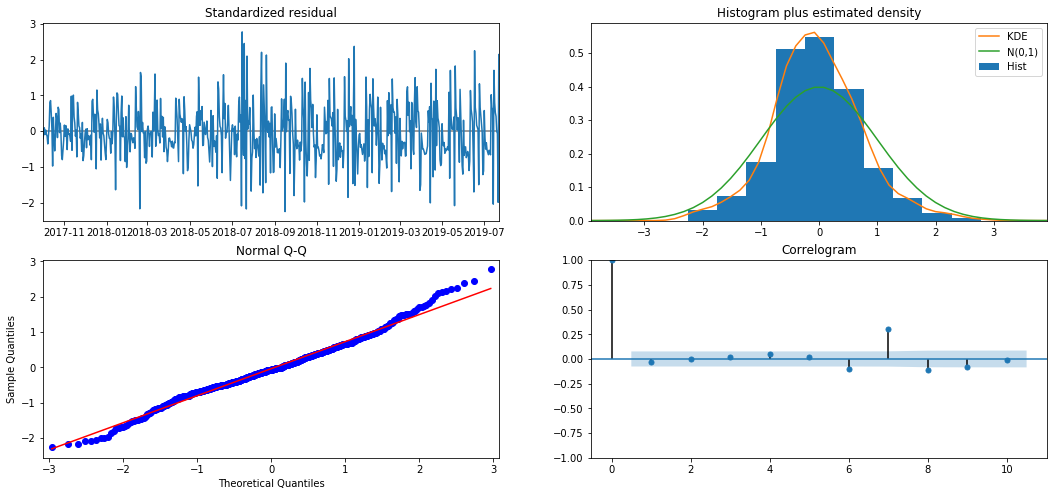

In [ ]:
results2.plot_diagnostics(figsize=(18, 8))
plt.show()

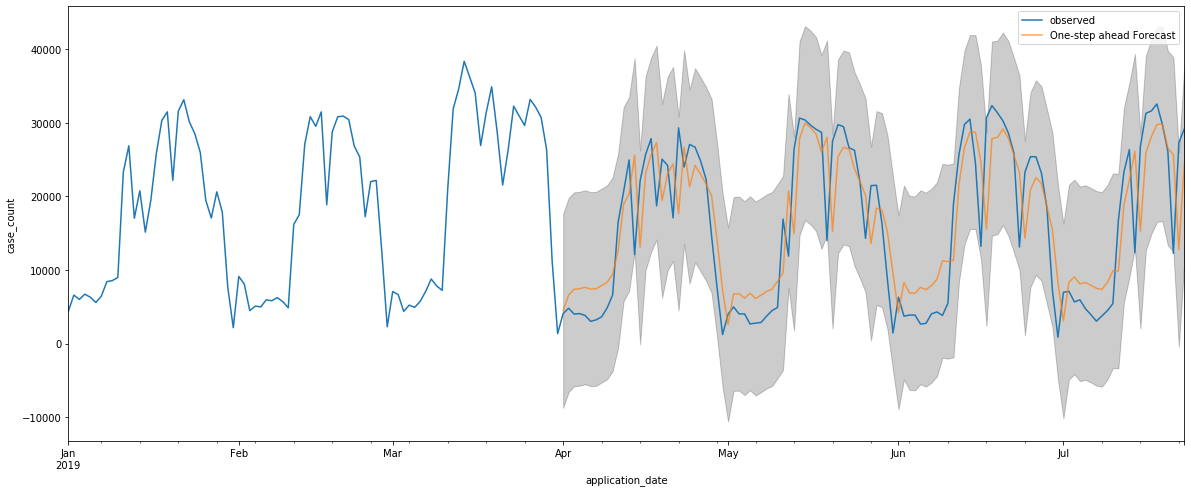

In [ ]:
pred2 = results2.get_prediction(start=pd.to_datetime('2019-04-01'), dynamic=False)
pred_ci2 = pred2.conf_int()
ax = daily_2.case_count['2019':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 8))
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('application_date')
ax.set_ylabel('case_count')
plt.legend()
plt.show()

In [ ]:
y_forecasted2 = pd.DataFrame(pred2.predicted_mean)
y_truth2 = daily_2['2019-04-01':]
mse = ((y_forecasted2[0] - y_truth2['case_count']) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 34167860.75
The Root Mean Squared Error is 5845.33


In [ ]:
mape_2 = (((y_forecasted2[0] - y_truth2['case_count'])/y_truth2['case_count']).abs()).mean()/len(daily_2.index)*100
mape_2

0.07829172682725914

In [ ]:
FORECAST = 93
next90d2 = results2.get_forecast(steps=FORECAST)
next90d_ci2 = next90d2.conf_int()

In [ ]:
futureDates = pd.date_range(start = '2019-07-24', periods=FORECAST, freq='D')
next90d_ci2.index = futureDates
next90d_ci2['case_count'] = (next90d_ci2['lower case_count'] +next90d_ci2['upper case_count'])/2
next90d_ci2 = next90d_ci2.drop(['lower case_count', 'upper case_count'], axis=1)
next90d_ci2['segment'] = 2
next90d_ci2 = next90d_ci2[['segment', 'case_count']]
next90d_ci2.reset_index(inplace = True)
next90d_ci2 = next90d_ci2.rename(columns={'index':'application_date'})
next90d_ci2

,application_date,segment,case_count
0,2019-07-24,2,26219.357614
1,2019-07-25,2,23167.368638
2,2019-07-26,2,20190.498544
3,2019-07-27,2,16486.813498
4,2019-07-28,2,14227.191783
...,...,...,...
88,2019-10-20,2,22273.393937
89,2019-10-21,2,20977.595565
90,2019-10-22,2,19896.506251
91,2019-10-23,2,18393.284668


### **Final Prediction**

In [ ]:
final_output = pd.concat([next90d_ci, next90d_ci2])
final_output.reset_index(inplace = True)
final_output['index'] = np.arange(len(final_output))+1
final_output = final_output.rename(columns={'index':'id'})
final_output

,id,application_date,segment,case_count
0,1,2019-07-06,1,2941.411979
1,2,2019-07-07,1,3590.129183
2,3,2019-07-08,1,3609.344222
3,4,2019-07-09,1,3584.572431
4,5,2019-07-10,1,3338.435205
...,...,...,...,...
175,176,2019-10-20,2,22273.393937
176,177,2019-10-21,2,20977.595565
177,178,2019-10-22,2,19896.506251
178,179,2019-10-23,2,18393.284668


In [ ]:
data = final_output.to_csv (r'data.csv', index = None, header=True)

In [ ]:
from google.colab import files
files.download('data.csv')